# CAPA online 

## Installation

To install the **capa_online** package from github using pip

 

```bash
python -m pip install 'git+https://github.com/grosed/capa_online/#egg=capa_online&subdirectory=package'
```

## Basic Usage

### Example 1

#### Generate data 

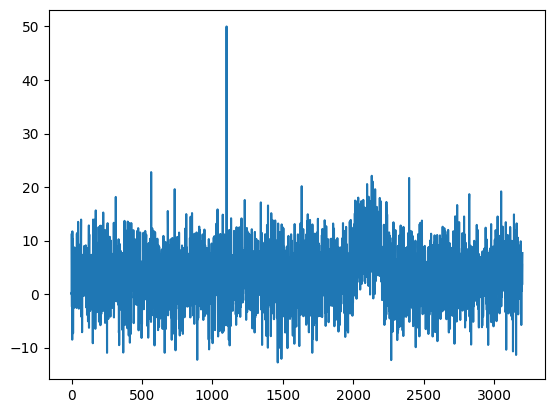

In [1]:
# create a simple example time series
import numpy as np

np.random.seed(1)
Z = [float(z) for z in list(np.random.normal(3, 5, 2000)) + 
    list(np.random.normal(10, 5, 200)) + # collective anomaly
    list(np.random.normal(3, 5, 1000))]
Z[1100] = 50 # point anomaly

# visualise the data
import matplotlib.pyplot as plt

plt.plot(Z)


#### Determine the underlying distribution using 1000 points for "burn in" period and create a transformer.

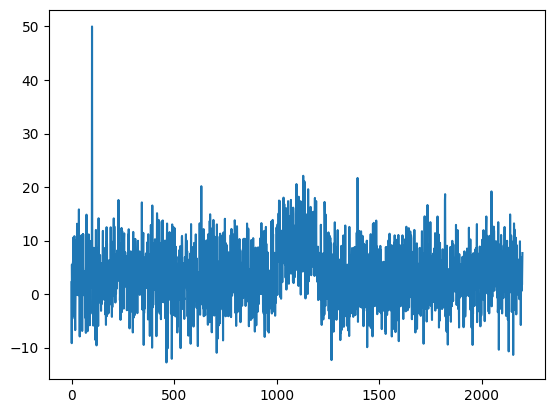

In [2]:
from capa_online import *
from statistics import mean,stdev

burn_in = Z[:1000]
transformer = scale(mean(burn_in),stdev(burn_in))

Z = Z[1000:]

plt.plot(Z)

#### Create a cost function with a window size of 500 and calculate penalties

In [3]:
from math import log

cost = capa_normal_mean(500)
beta = 4*log(len(Z))
beta_dash = 3*log(len(Z))

#### Create a CAPA "scanner" from the cost and the transformer

In [4]:
scanner = compose(capa(cost,beta,beta_dash),transformer)

#### Simulate a stream of data using the time series, scan the data using CAPA, and store the change history.

In [5]:
history = list()
for z in Z :
    changes = scanner(z)
    history.append(changes)

In [10]:
history[500]

[]

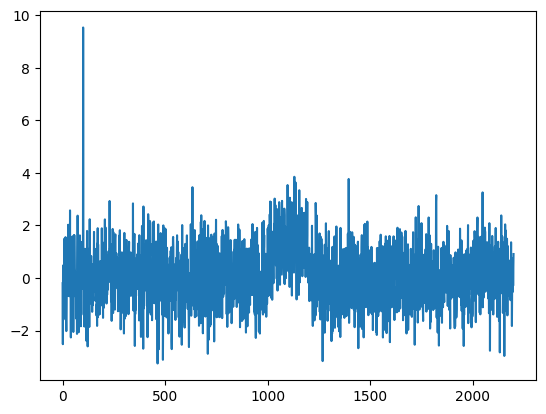

In [7]:
Y = [transformer(z) for z in Z]
plt.plot(Y)